# Data Scientist Associate Practical Exam

## Company Background
GoalZone is a fitness club chain providing five types of fitness classes in Canada. Finally, the fitness classes schedule is back to normal after the COVID-19 restrictions are lifted. However, they have received many complaints from the customers about having a hard time booking a fitness class.

From initial analysis, the program operation team found out that the fitness classes are always fully booked but are having a low attendance rate per class. To improve this situation, they would like to increase the class capacity for customers to sign up if a low attendance rate is predicted.  


## Customer Question
The operation manager has asked you to answer the following:
- Can you predict the attendance rate for each fitness class? 



## Dataset
The dataset contains the attendance information for the class scheduled this year so far. The data you will use for this analysis can be accessed here: `"data/fitness_class.csv"`

| Column Name                     | Criteria                                                                                                                                                                        |
|---------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Day of Week                     | Character, the day of the week the class was scheduled, one of values from “Mon” to “Sun”.                                                                                      |
| Time                            | Character, the time of the day the class was scheduled, either "AM" or "PM".                                                                                                        |
| Class Category                  | Character, the category of the fitness class, one of “Yoga”, “Aqua”, “Strength”, “HIIT”, or “Cycling”.                                                                          |
| Days Before                     | Numeric, number of days the class stayed fully booked, maximum five days.                                                                                                       |
| Class Capacity                  | Numeric, maximum number of members can sign up for that class, either 15 or 25.  The class capacity being 26 needs to be updated to 25.                                         |
| Attendance                      | Numeric, number of members actually attended the class.                                                                                                                         |
| Average Age                     | Numeric, average age of the members signing up for that class.  Remove rows that average age is smaller than 14 because group fitness class are for members aged 14 and order.  |
| Number of New Students          | Numeric, number of new students signing up for this class.                                                                                                                      |
| Number of Members Over 6 months | Numeric, number of members signing up for the class have been joining the club more than 6 months.                                                                              |                                                                                     |

# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


In [49]:
# Data Validation
# Check all variables in the data against the criteria in the dataset above

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# import and basic dataset information 
df = pd.read_csv('data/fitness_class.csv')
print ( 'Dataset info')
print(' ')
df.info()
print(' ')
print ( 'Description of dataset')
print(' ')
print(df.describe(include='all'))
print(' ')
print ( 'Number of missing values')
print(' ')
print(df.isna().sum())
print(' ')

# data cleaning 
# check there are 7 days of the week
print('Days')
print(set(df['day_of_week']))
print(' ')
# check the times are AM or PM
print('Times')
print(set(df['time']))
print(' ')
# check class names
print ('Categories')
print(set(df['class_category']))
print(' ')

# check class capacity
print('Class capacity')
print(set(df['class_capacity']))
# number of incorrect capacities
print('number of incorrect capacities :',len(df[df.class_capacity>25]))
# convert capacity 26 into 25
df['class_capacity'].where(df['class_capacity']<=25,25,inplace=True)
print(' ')

# number of age < 14
print('number of age <14 :', len(df[df.age<14]))
# the number is 3, so we drop the rows as it is a small number
df=df.drop((df[df.age < 14]).index)
print(' ')

# after cleaning
print ( 'Dataset info after cleaning ')
print(' ')
df.info()
print(' ')
print ( 'Description of dataset after cleaning')
print(' ')
print(df.describe())


Dataset info
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   day_of_week     765 non-null    object 
 1   time            765 non-null    object 
 2   class_category  765 non-null    object 
 3   class_capacity  765 non-null    int64  
 4   days_before     765 non-null    int64  
 5   attendance      765 non-null    int64  
 6   age             765 non-null    float64
 7   new_students    765 non-null    int64  
 8   over_6_month    765 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 53.9+ KB
 
Description of dataset
 
       day_of_week time class_category  class_capacity  days_before  \
count          765  765            765      765.000000   765.000000   
unique           7    2              5             NaN          NaN   
top            Thu   PM           Yoga             NaN          NaN   
freq        

## Data Validation
Describe the validation tasks you completed and what you found. Have you made any changes to the data to enable further analysis? Remember to describe what you did for every column in the data. 

The initial dataset contains 765 rows and 9 columns with no missing values. The data validation against the criteria in the description is as follows:

* day of week: same as description, 7 days
* time: same as description, 2 times, AM and PM
* class category: same as description, 5 categories
* class capacity: 5 values were above 25 and have been corrected to 25. There are now two capacity values, 15 and 25
* days before: same as description, maximum of 5 days
* attendance: same as description
* age: 3 values were below 14 yo. since this was a small fraction of the dataset, the rows for these cases have been deleted.
* new students: same as description
* over 6 months: same as description

After data validation, the dataset contains 762 rows and 9 columns

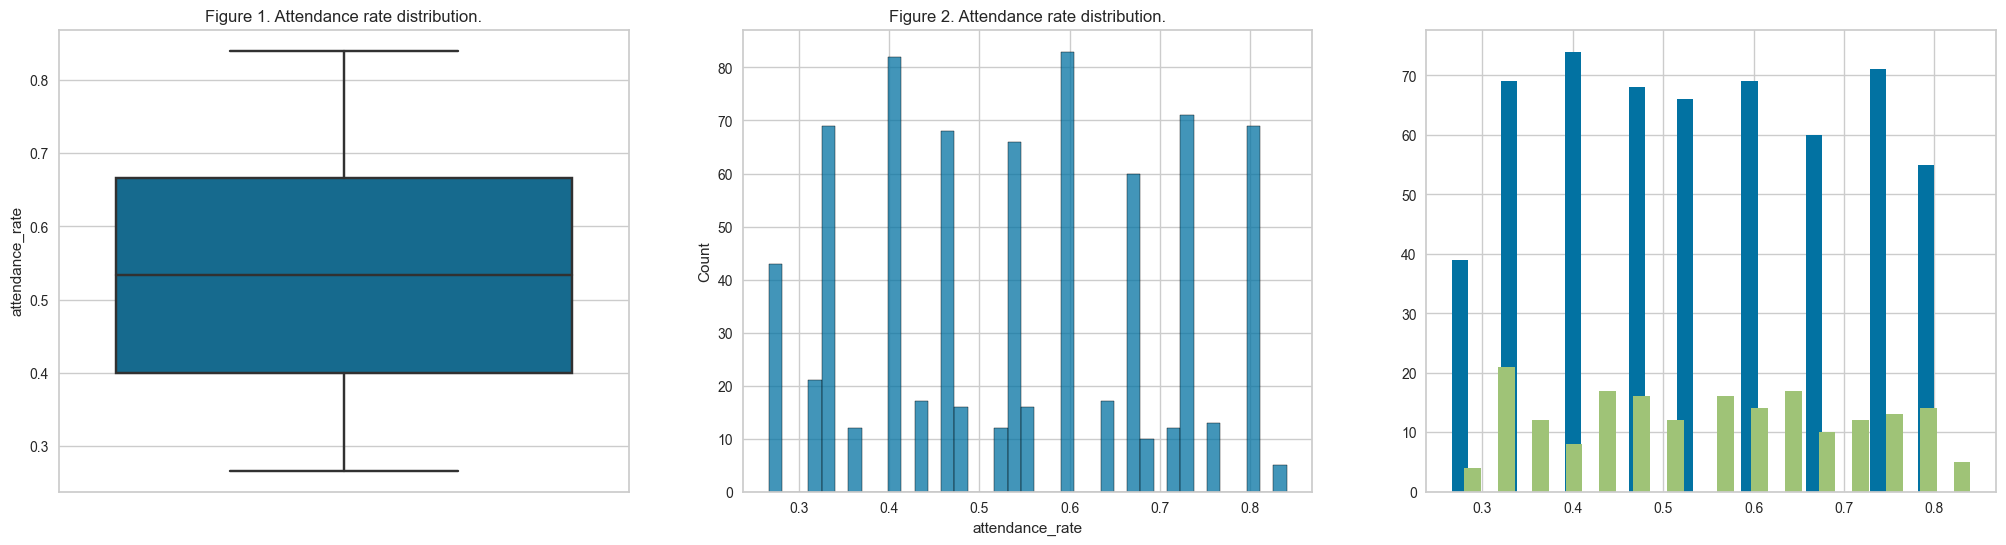

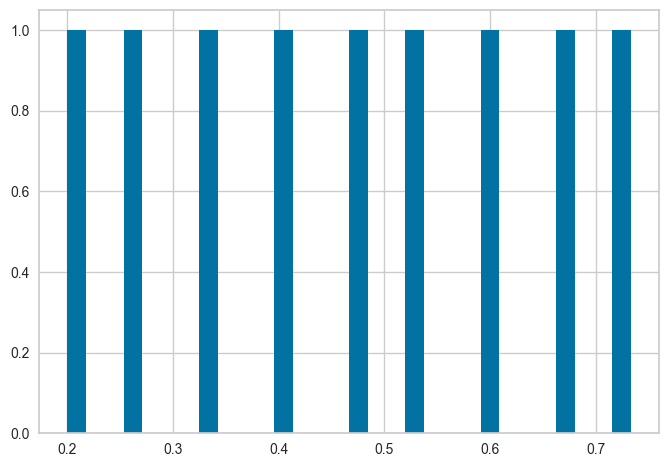

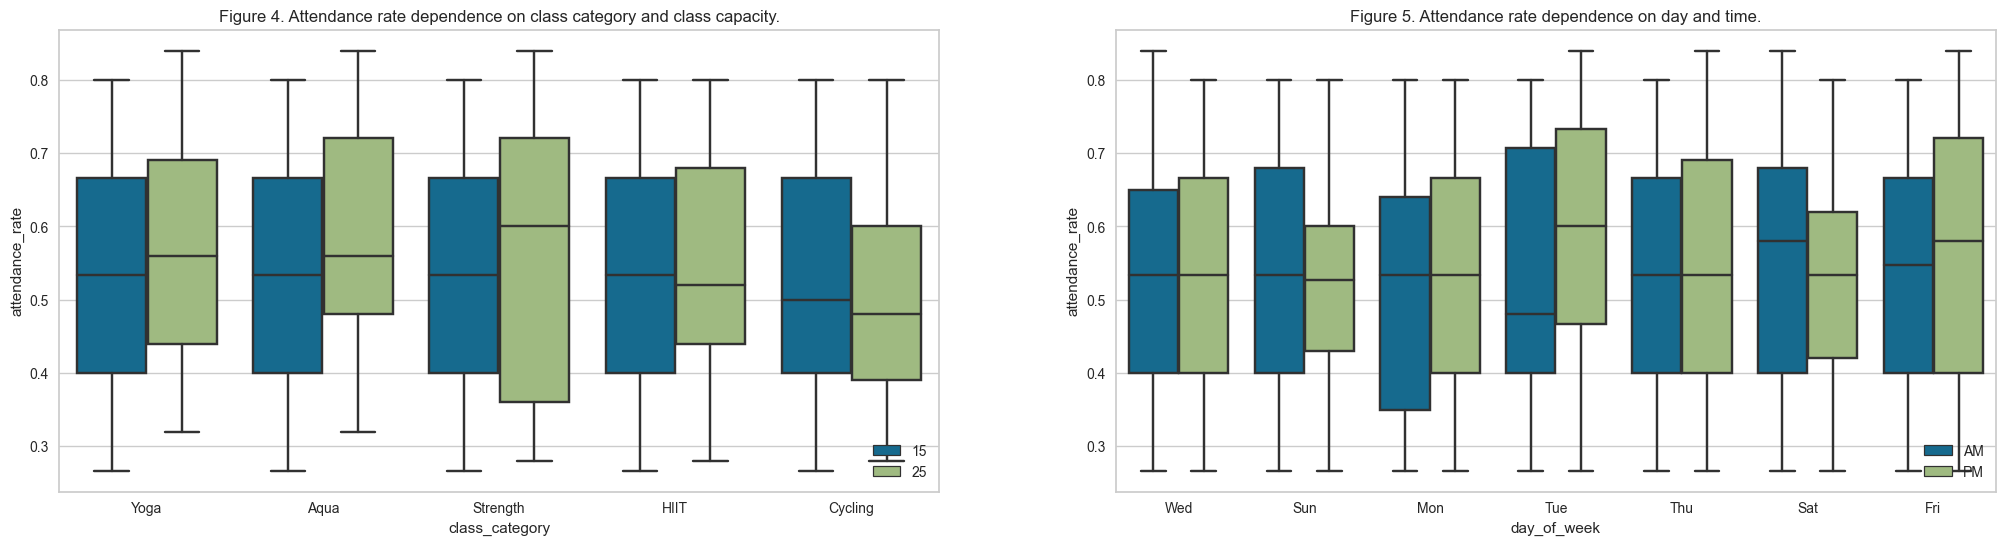

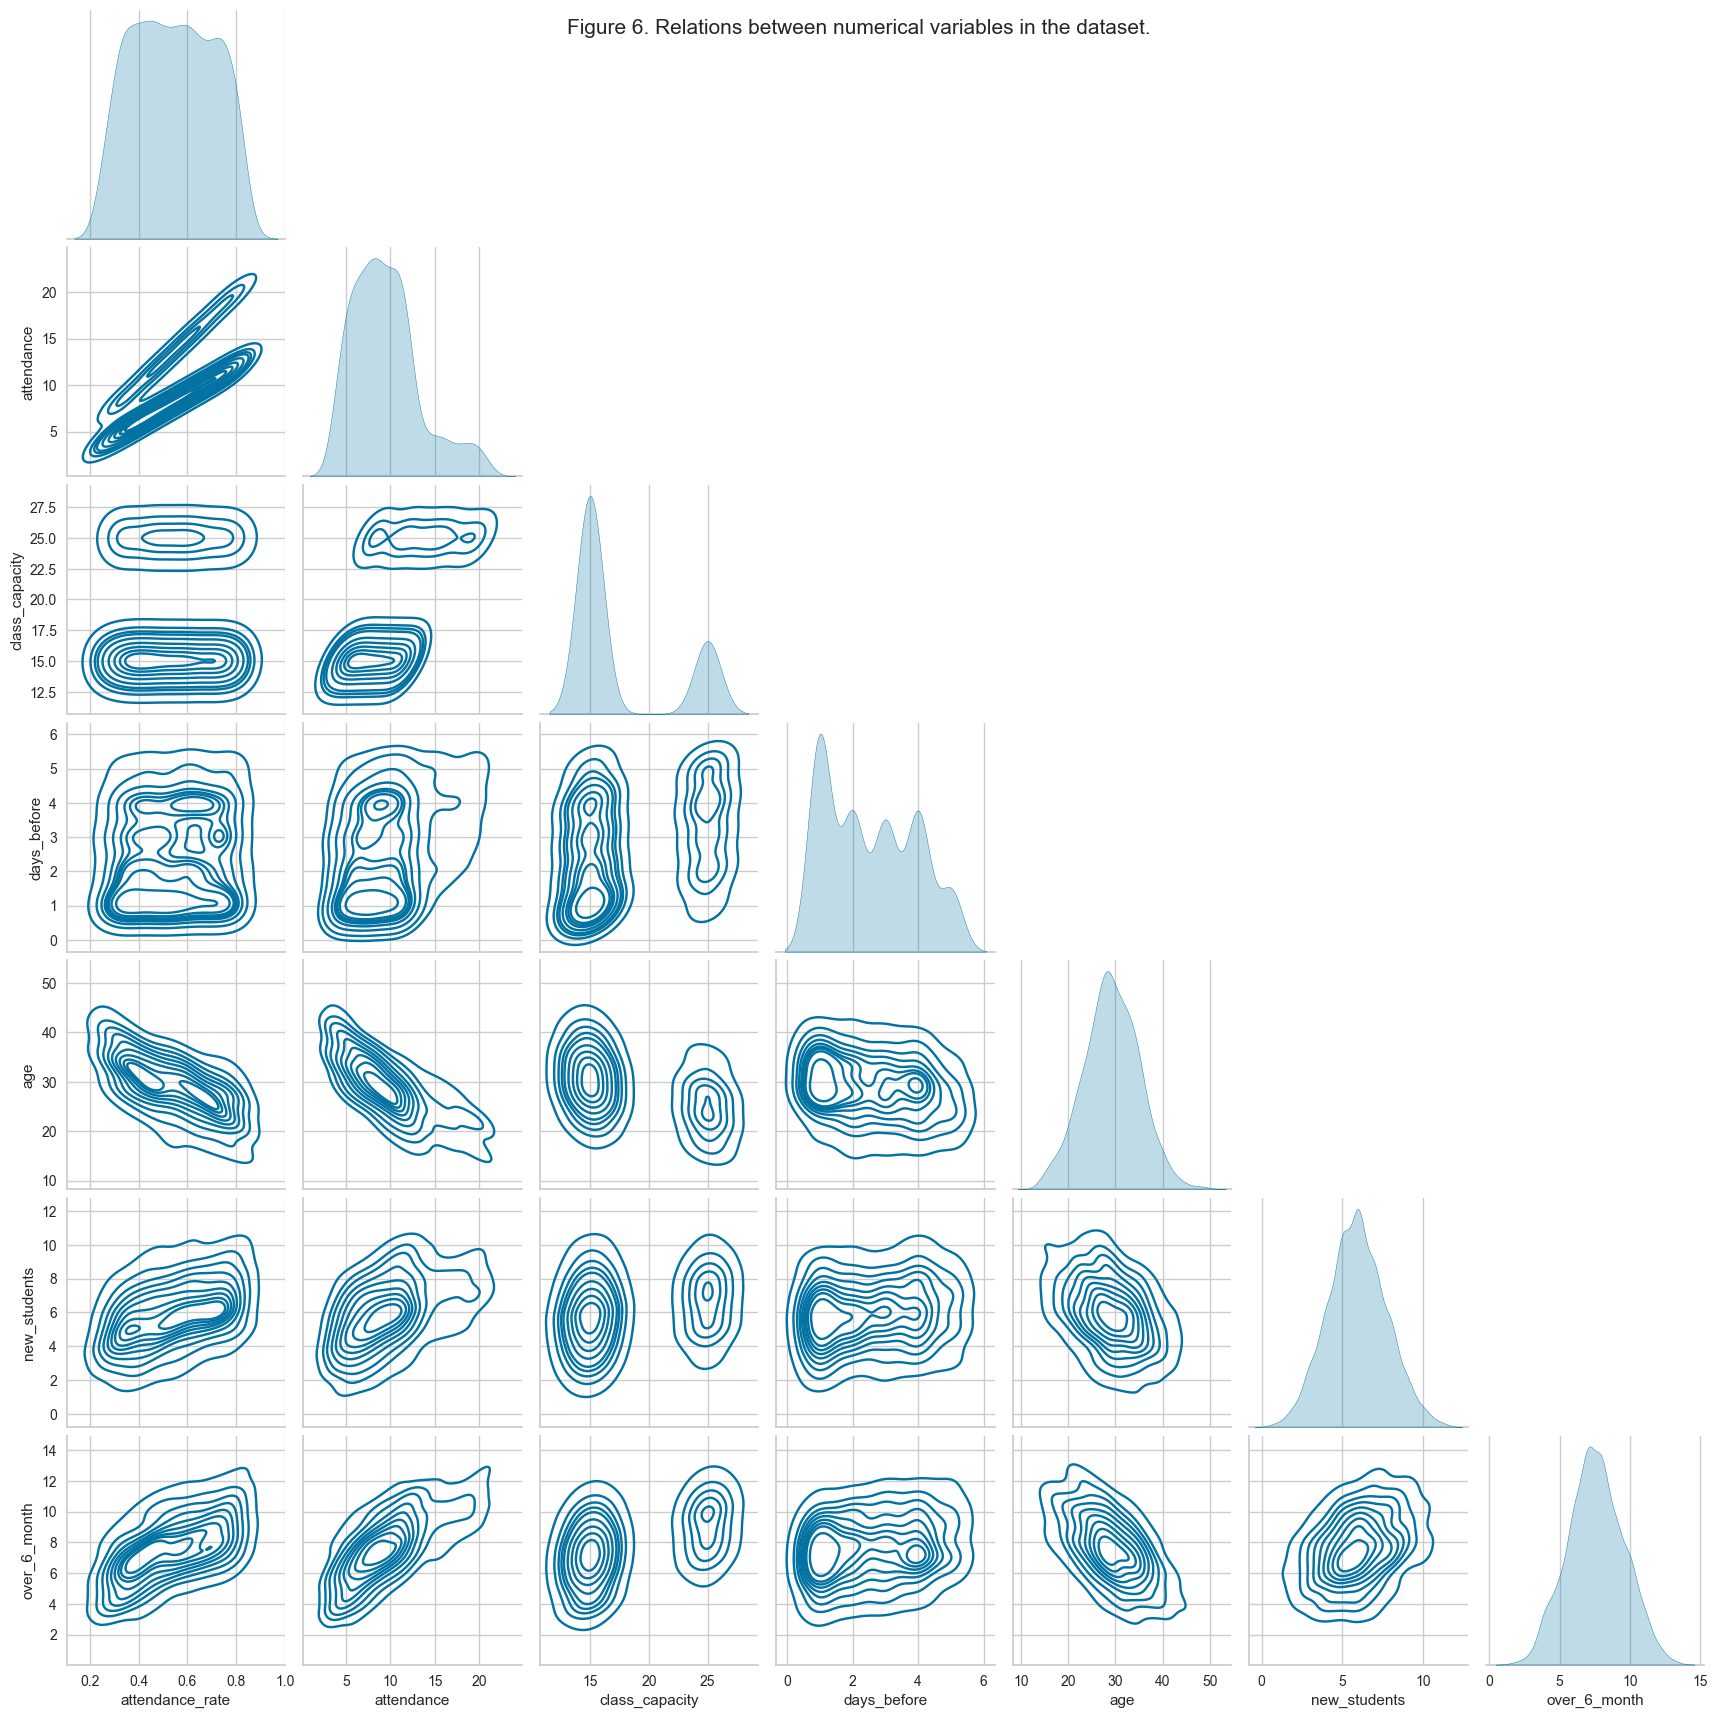

In [50]:
# Exploratory Analysis
# Explore the characteristics of the variables in the data

# calculating attendance rate for each class
df['attendance_rate'] = df.attendance/ df.class_capacity 


fig, ax = plt.subplots(1,3,figsize=(25,6))
# boxplot of target variable attendance_rate
sns.boxplot(y='attendance_rate',data=df,ax=ax[0]).set(title='Figure 1. Attendance rate distribution.')

# histogram of target variable attendance_rate
sns.histplot(df['attendance_rate'],bins=39
             ,ax=ax[1]).set(title='Figure 2. Attendance rate distribution.')

df.groupby('class_capacity').attendance_rate.hist(bins=30)
plt.show()


# how attendance_rate depends on class capacity
sns.boxplot(x='class_capacity',y='attendance_rate',data=df,ax=ax[2]).set(title='Figure 3. Attendance rate with respect to class capacity.')
plt.show()



# dependences with other categorical variables
fig, ax = plt.subplots(1,2,figsize=(25,6))
# with class category and class capacity
sns.boxplot(x='class_category',y='attendance_rate',hue='class_capacity', data=df,ax=ax[0]).set(title= 'Figure 4. Attendance rate dependence on class category and class capacity.')
ax[0].legend(loc='lower right')


# with day of the week and time
sns.boxplot(x='day_of_week',y='attendance_rate',hue='time',data=df,ax=ax[1]).set(title= 'Figure 5. Attendance rate dependence on day and time.')
ax[1].legend(loc='lower right')
plt.show()


# relations between numerical variables 
g=sns.pairplot(df[['attendance_rate','attendance','class_capacity','days_before','age','new_students','over_6_month',]],corner=True,kind='kde')
g.fig.suptitle("Figure 6. Relations between numerical variables in the dataset.", fontsize=15)
plt.show()

## Exploratory Analysis
Describe what you found in the exploratory analysis. In your description you should:
- Reference at least two different data visualizations you created above to demonstrate the characteristics of single variables
- Reference at least one data visualization you created above to demonstrate the relationship between two or more variables
- Describe what your exploratory analysis has told you about the data
- Describe any changes you have made to the data to enable modeling

The first thing that we do is to create the attendance rate variable, which will be our target variable. The 
attendance rate is obtained as the ratio between attendance and class capacity. Figure 1 shows the distribution of the attendance_rate variable as a boxplot. The median is slightly above 0.5 and the tails extend to below and above 0.3 and 0.8, respectively. There are no outliers. Because the distance between successive quartiles is similar to the length of the whiskers, this suggests that the attendance rate may be distributed quite uniformly. The histogram in Figure 2 shows that indeed the attenance rate distribution is rather uniform.

Because we have included the information of the variable class capacity in the attendance rate, we may be able to discard the class capacity variable from further analysis. However, we first want to check whether there are dependences of attendance rate on class capacity, not visible at first sight and that can be missed by ignoring this variable. For example, if the gym customers had access to the class capacity or number of available spots data for each class, that may impact their registration: some customers may be scared of signing up if they see a large class capacity, afraid of high social interaction just after covid-19, or they may think that a large number of available spots suggests that the class is not very entertaining. We plot the distribution of attendance rates with respect to class capacity in Figure 3. Both distributions in this plot are broadly similar but the attendance rate values for the largest class capacity case are  slightly shifted upwards. 

Figures 4 and 5 show relations between the attendance_rate and other categorical variables. We find mild differences between class categories, days of the week or times, although there are stronger differences between individual cases. For example, we clearly see low values of attendance_rate for Monday mornings, or larger values of attendance rate in the morning compared to the afternoon during weekends. This is the opposite for the weekdays, where the upper quantiles of the afternoon distributions reach higher values. We have again plotted the attendance rate per class category considering the class capacity, which seems to introduce some differences on the observed values. 

Figure 6 shows relations between the numerical variables in the dataset, replacing the attendance by the attendance rate varialbe. Interestingly, we see a strong anticorrelation between the average age and the attendance_rate. At large attendance_rate values, the mean age is lower, or in other words, the attendance_rate is larger when more young people sign up for the classes. The increase of attendance_rate is related to an increase in both new members and previous members, although the second group may be more relevant given the perhaps steeper slope of the relation between this group and the attendance_rate. In both cases, larger numbers of members again correlate strongly with younger average ages. 

This analysis suggests that the average age may play a major role in the determination of the attendance_rate. The age is related to the number of new and previous members too. The other variables may have a milder or less clear effect, but we will include them in the analysis to account for their information, including the class capacity. We will, however, replace the attendance by the attendance rate as the target variable, following our previous discussion.


Changes performed to the dataset after the exploratory analysis:
* In order to model the data we will convert all the categorical variables to numerical via dummy variables
* We discard from the analysis the attendance variable and use instead the attendance_rate 
  as our target variable. 


### changes to the data before model fitting

In [51]:
# discard attendance and class capacity
df = df.drop(columns=['attendance'])
print(df.columns)
print(' ')

# convert categorical to numerical via dummies and create X and y data
features = df.drop(columns=['attendance_rate'])
X = pd.get_dummies(features, columns=['day_of_week', 'time', 'class_category'])
y = df['attendance_rate'] 

Index(['day_of_week', 'time', 'class_category', 'class_capacity',
       'days_before', 'age', 'new_students', 'over_6_month',
       'attendance_rate'],
      dtype='object')
 


In [52]:
# Model Fitting
# Choose and fit a baseline model
# Choose and fit a comparison model

#import ML models and peformance metrics
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE 
from sklearn.metrics import mean_absolute_error as MAE

# Split dataset into 70% training set and 30% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11,stratify=y)


# 1 - LINEAR REGRESSION MODEL

# first scale values
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# fit linear regression model
lreg = LinearRegression()
lreg.fit(X_train_sc,y_train)
# predict
lregpred = lreg.predict(X_test_sc)


# 2 - XGB REGRESSION
# not scaled values in this case

# fit XGB regression model
# old loss function 'reg:linear' has been deprecated in favor of 'reg:squarederror'
xgbreg = XGBRegressor(objective='reg:squarederror', random_state=11)
xgbreg.fit(X_train,y_train)
xgbregpred=xgbreg.predict(X_test)

## Model Fitting
Describe your approach to the model fitting. In your description you should:
- Describe what type of machine learning problem you are working on
- Describe which method you selected for the baseline model and explain why you chose this model
- Describe which method you selected for the comparison model and explain why you chose this model

We want to predict the attendance rate in the classes. This is a continuous numerical variable and therefore we face a **regression problem**. 

For the **baseline model** we will adopt a **Linear Regression model**. This model is simple and easy to use, as well as fast to train and easily interpretable. We will scale the data for this model since linear regression is sensitive to unscaled data. The **comparison model** will be an **Extreme Gradient Boosting (XGB) Regression model**. This model is flexible and powerful, and the usage of trees can account for non-linear dependencies not captured by the linear baseline model if they exist. It also is an ensemble model, which helps overcome overfitting problems that can occurr in other tree methods. This model does not require the scaling of values, so we will skip this step in this case. 

In [53]:
# Model Evaluation
# Choose a metric and evaluate the performance of the two models

# 1 - LINEAR MODEL EVALUATION
print ('rsquared =', lreg.score(X_test_sc, y_test) )
print ('RMSE LINEAR =', MSE(y_test, lregpred, squared=False) )
print ('MAE LINEAR =', MAE(y_test, lregpred) )
print(' ')

# 2 - XGB MODEL EVALUATION
print ('rsquared =', xgbreg.
score(X_test, y_test) )
print ('RMSE XGB =', MSE(y_test, xgbregpred, squared=False) )
print ('MAE XGB =', MAE(y_test, xgbregpred) )

rsquared = 0.5957713099403593
RMSE LINEAR = 0.10311855636927364
MAE LINEAR = 0.08297056157866747
 
rsquared = 0.42780483415104564
RMSE XGB = 0.122686096699709
MAE XGB = 0.098459635507939


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

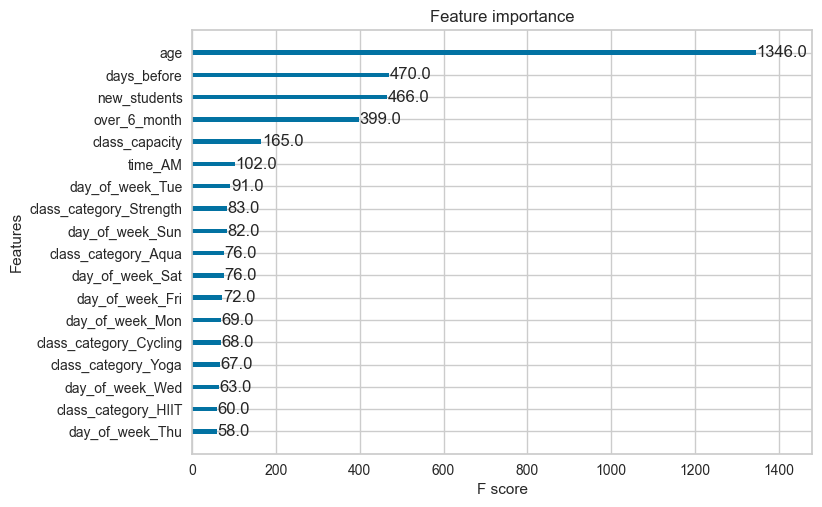

In [54]:
import xgboost as xgbx
xgbx.plot_importance(xgbreg)

## Model Evaluation
Explain what the results of your evaluation tell you. You should:
- Describe which metric you have selected to compare the models and why
- Explain what the outcome of this evaluation tells you about the performance of your models
- Identify, based on the evaluation, which you would consider to be the better performing approach

For the evaluation of the models we chose the root mean squared error and the mean absolute error, since the second is less sensitive to extreme values. For completeness we also calculated the determination coefficient in both cases. 
For both models we obtain quite low determination coefficients, indicating that a relatively low (57% and 36%, respectively) of the variance in the data can be accounted for by the models. The error values, however, are low, indicating that the models performed well at predicting the test data. In general, the simpler linear regression model results in around 10-20% smaller error values compared to those from the XGB model. This indicates that the linear regression model performs better than the XGB one when the default parameters are considered. 

Coming back to our discussion of the class capacity variable, we tested that discarding this feature from the modeling resulted in an overall increase of the errors from around a few to about 10%. We finally plot the importance of each feature for the XGB model, showing that the age variable has the major impact on the results, followed by the number of new and previous members, as expected. The class capacity appears to contribute slightly more than the days of the week and class category, but far less than the aforementioned major contributors. 


LINEAR MODEL

Prediction Error Plot


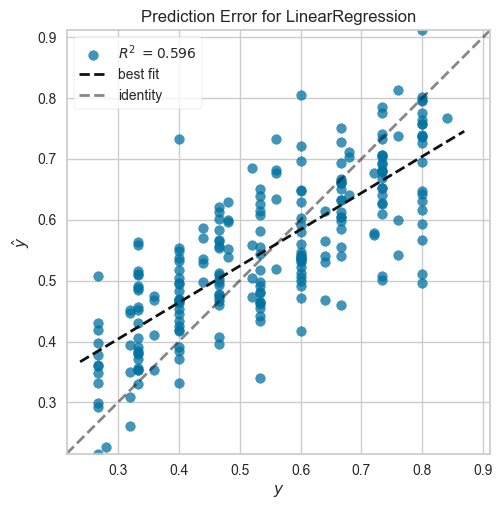

PredictionError(ax=<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>,
                estimator=LinearRegression())

Residuals Plot


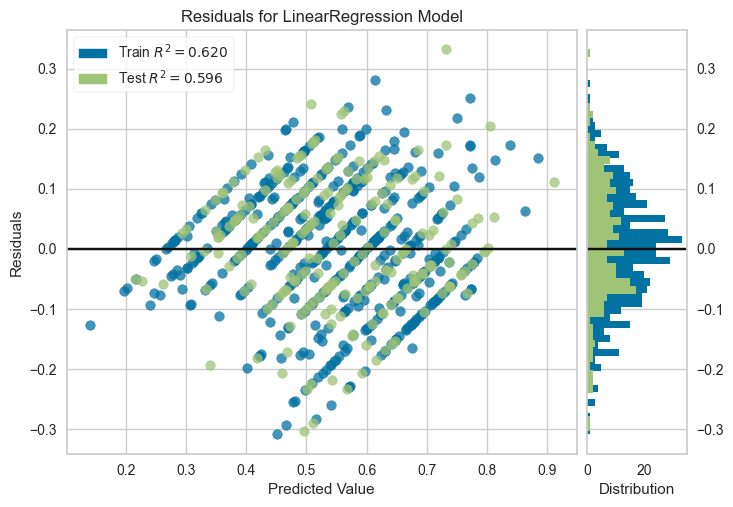

YellowbrickAttributeError: neither visualizer 'ResidualsPlot' nor wrapped estimator 'LinearRegression' have attribute 'line_color'

In [ ]:
from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error

print ( 'LINEAR MODEL')
# Making the Prediction Error Plot
print("\nPrediction Error Plot")
print(prediction_error(lreg, X_train_sc, y_train, X_test_sc, y_test))

# Making the Residuals Plot
print("\nResiduals Plot")
print(residuals_plot(lreg, X_train_sc, y_train, X_test_sc, y_test))

In [ ]:




print( ' ')
print ( 'XGB MODEL')
# Making the Prediction Error Plot
print("\nPrediction Error Plot")
print(prediction_error(xgbreg, X_train, y_train, X_test, y_test))

# Making the Residuals Plot
print("\nResiduals Plot")
print(residuals_plot(xgbreg, X_train, y_train, X_test, y_test))

## ✅ When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review grading rubric. Have you included everything that will be graded?
- Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam